In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os

In [3]:
anatomic_connectivities =pd.read_csv('/Users/samsonkoelle/cm_zack_layer6merge_strength.csv', index_col = 0)
anatomic_connectivities_den =pd.read_csv('/Users/samsonkoelle/cm_zack_layer6merge_den.csv', index_col = 0)
anatomic_connectivities_tot =pd.read_csv('/Users/samsonkoelle/cm_zack_layer6merge_tot.csv', index_col = 0)
zack_sample = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/719161530.csv', index_col = 0)
zack_names = zack_sample.index

#determine reorder to match zack indices
namessam = anatomic_connectivities.index
rns =namessam[np.hstack([range(15,20), range(10,15),range(25,30), range(0,5), range(20,25), range(5,10)])]

ac_strength_zack = anatomic_connectivities.loc[rns,rns]
ac_den_zack = anatomic_connectivities_den.loc[rns,rns]
ac_tot_zack = anatomic_connectivities_tot.loc[rns,rns]

ac_strength_zack.index = zack_names
ac_strength_zack.columns = zack_names
ac_den_zack.index = zack_names
ac_den_zack.columns = zack_names
ac_tot_zack.index = zack_names
ac_tot_zack.columns = zack_names

In [4]:
#print connection strength (average over source, sum over target), density (average over source and target), total (sum over source and target)
np.asarray([anatomic_connectivities['VISp2/3'],anatomic_connectivities_den['VISp2/3'],anatomic_connectivities_tot['VISp2/3']]).transpose()

array([[           nan,            nan,            nan],
       [           nan,            nan,            nan],
       [9.21319653e-02, 9.13101737e-05, 5.15939005e+00],
       [2.18757270e-01, 2.16806016e-04, 2.10006980e+01],
       [           nan,            nan,            nan],
       [           nan,            nan,            nan],
       [6.42146425e-02, 6.36418657e-05, 6.35724960e+00],
       [7.48724788e-02, 7.42046371e-05, 2.24617437e+00],
       [6.75694146e-02, 6.69667142e-05, 7.63534385e+00],
       [           nan,            nan,            nan],
       [           nan,            nan,            nan],
       [3.66929144e-01, 3.63656238e-04, 5.61401590e+01],
       [4.00824504e-01, 3.97249261e-04, 3.64750299e+01],
       [2.42149009e-01, 2.39989107e-04, 3.92281395e+01],
       [9.86325587e-02, 9.77527836e-05, 1.19345396e+01],
       [           nan,            nan,            nan],
       [6.68672120e-01, 6.62707750e-04, 6.74690169e+02],
       [6.04829096e-01, 5.99434

In [5]:
#remove self connections
replaces = np.zeros((5,5))
replaces[:] = np.nan
ac_strength_zack.iloc[:5,:5] = replaces
ac_strength_zack.iloc[5:10,5:10] = replaces
ac_strength_zack.iloc[10:15,10:15] = replaces
ac_strength_zack.iloc[15:20,15:20] = replaces
ac_strength_zack.iloc[20:25,20:25] = replaces
ac_strength_zack.iloc[25:30,25:30] = replaces

ac_den_zack.iloc[:5,:5] = replaces
ac_den_zack.iloc[5:10,5:10] = replaces
ac_den_zack.iloc[10:15,10:15] = replaces
ac_den_zack.iloc[15:20,15:20] = replaces
ac_den_zack.iloc[20:25,20:25] = replaces
ac_den_zack.iloc[25:30,25:30] = replaces

ac_tot_zack.iloc[:5,:5] = replaces
ac_tot_zack.iloc[5:10,5:10] = replaces
ac_tot_zack.iloc[10:15,10:15] = replaces
ac_tot_zack.iloc[15:20,15:20] = replaces
ac_tot_zack.iloc[20:25,20:25] = replaces
ac_tot_zack.iloc[25:30,25:30] = replaces

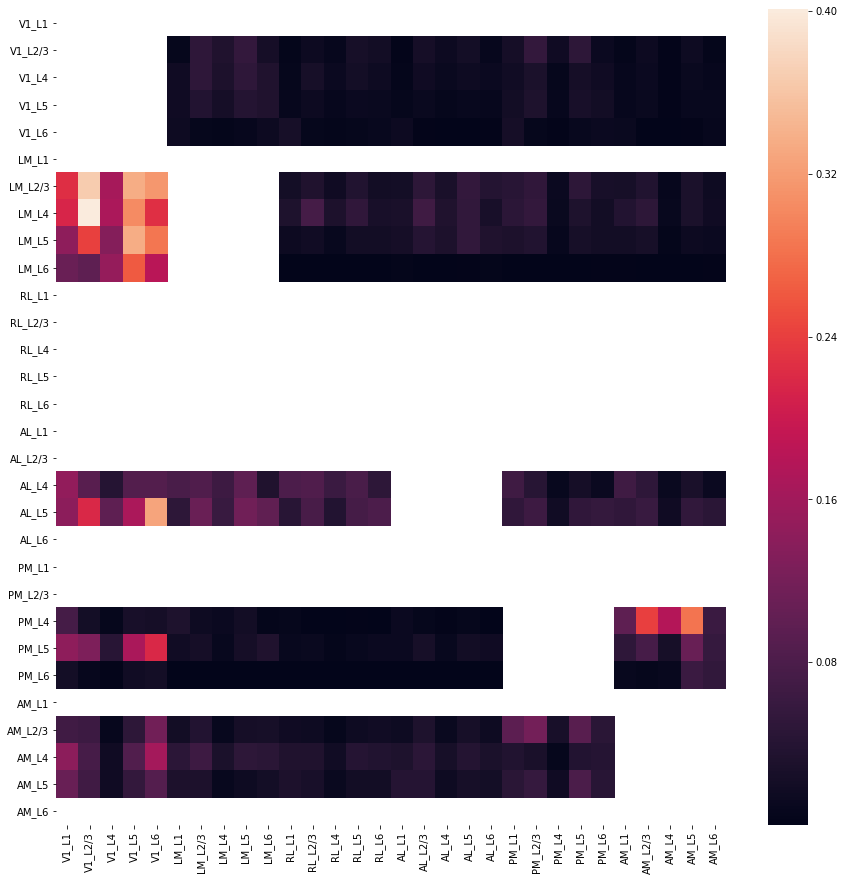

In [6]:
fig ,ax = plt.subplots(figsize = (15,15))

sns.heatmap(ac_strength_zack, ax = ax)

plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_strength_full')

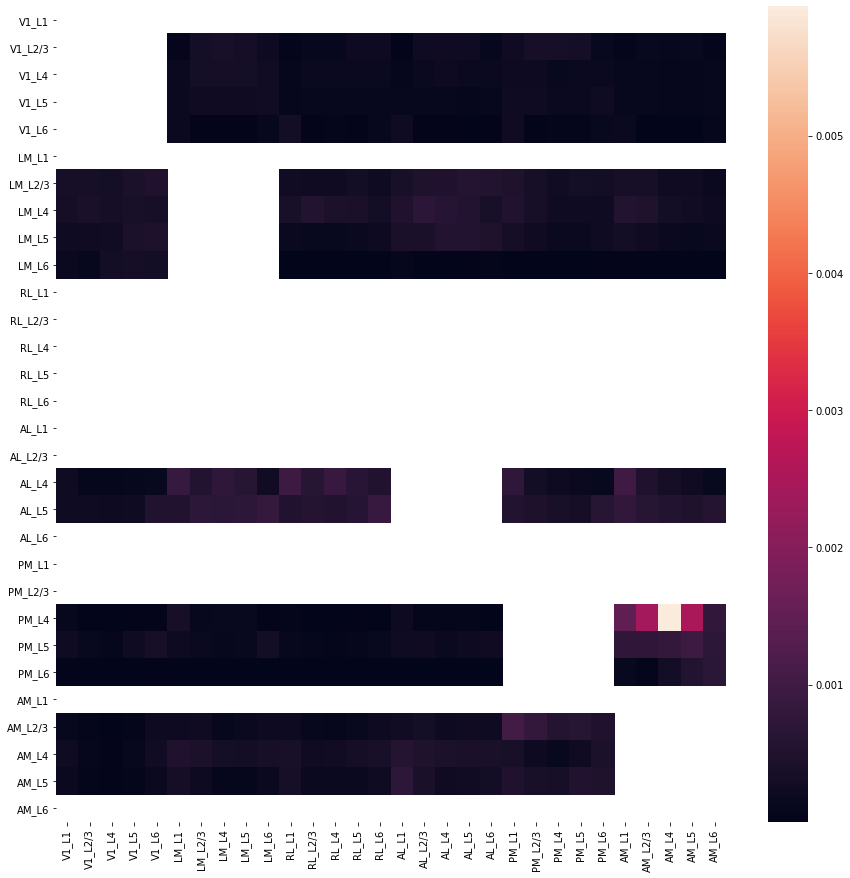

In [7]:
fig ,ax = plt.subplots(figsize = (15,15))
sns.heatmap(ac_den_zack, ax = ax)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_den_full')

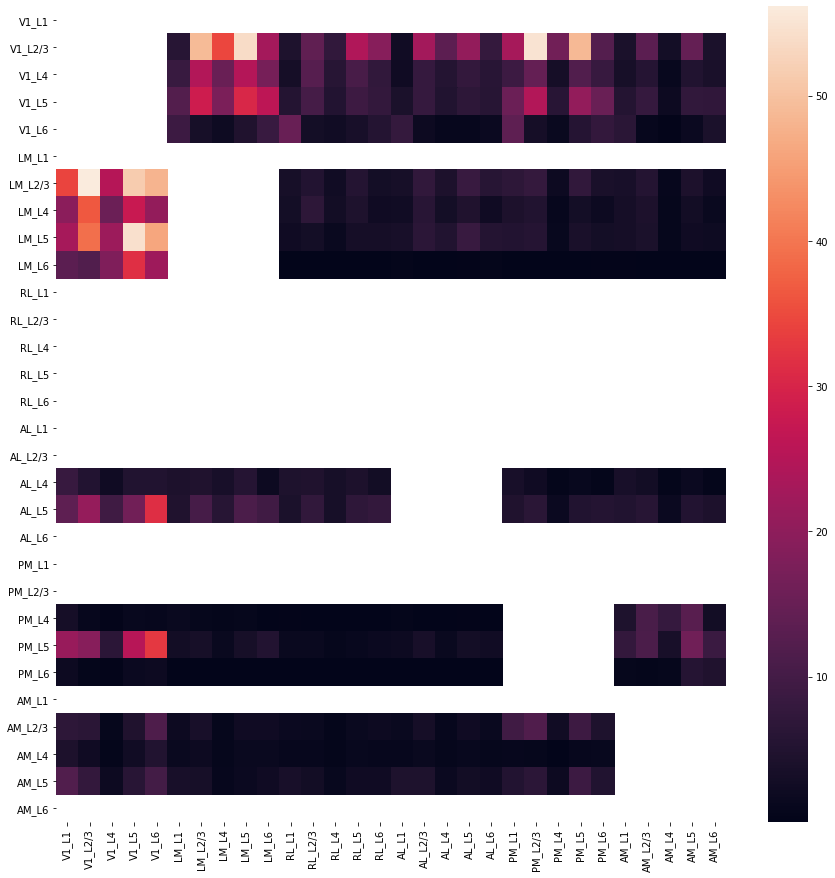

In [8]:
fig ,ax = plt.subplots(figsize = (15,15))
sns.heatmap(ac_tot_zack, ax = ax)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_total_full')

0 0


/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


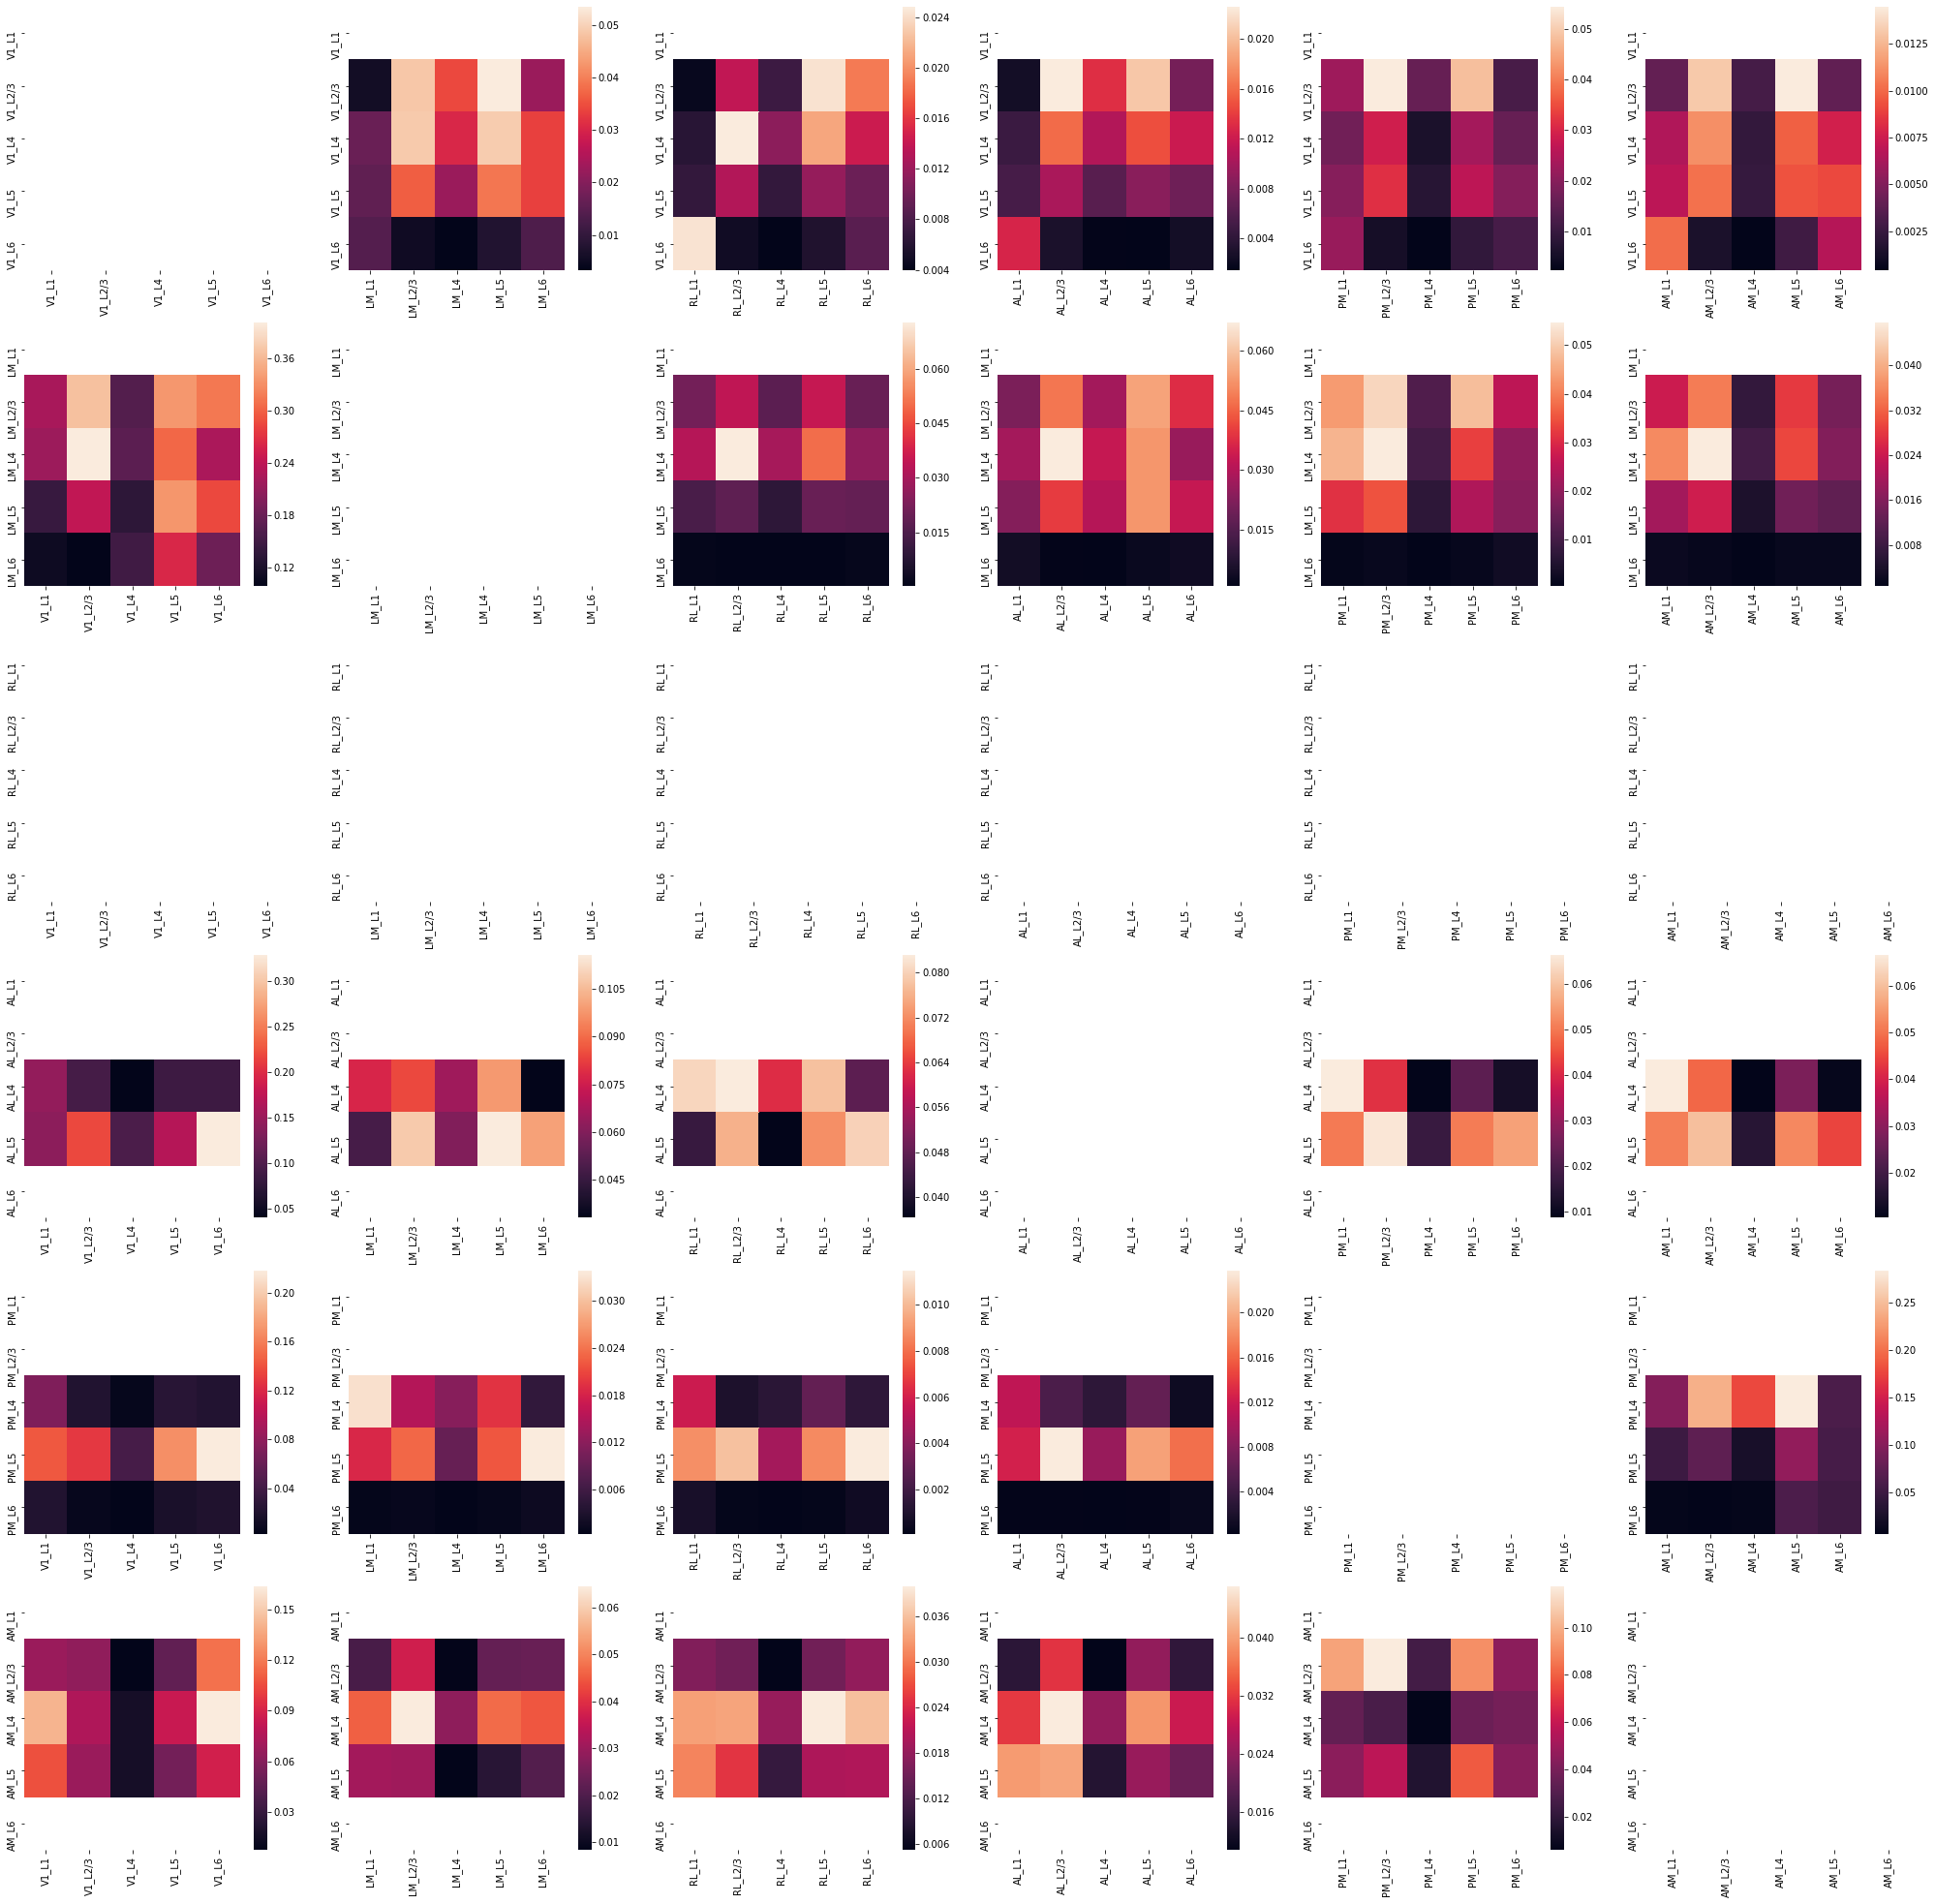

In [9]:
fig ,axes = plt.subplots(6,6,figsize = (35,35))

for i in range(6):
    for j in range(6):
        print(i,j)
        sr = ac_strength_zack.iloc[(5*i):(5*i+5),(5*j):(5*j+5)]
        if ~np.isnan(np.nanmax(np.asarray(sr))):
            sns.heatmap(sr, ax = axes[i,j])
        else:
            #sr.iloc[:5,:5] = np.zeros((5,5))
            tmp = pd.DataFrame(np.zeros((5,5)), index = sr.iloc[:5,:5].index, columns = sr.iloc[:5,:5].columns)
            sns.heatmap(tmp, ax = axes[i,j], cmap=ListedColormap(['white']),cbar=False)#, color= 'white')
            #axes[i,j].set_colorbar('off')
            #ax.col
        xticklabels = axes[i,j].get_xticklabels()
        axes[i,j].set_xticklabels(xticklabels, rotation = 90)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_strength_subplots')

0 0


/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


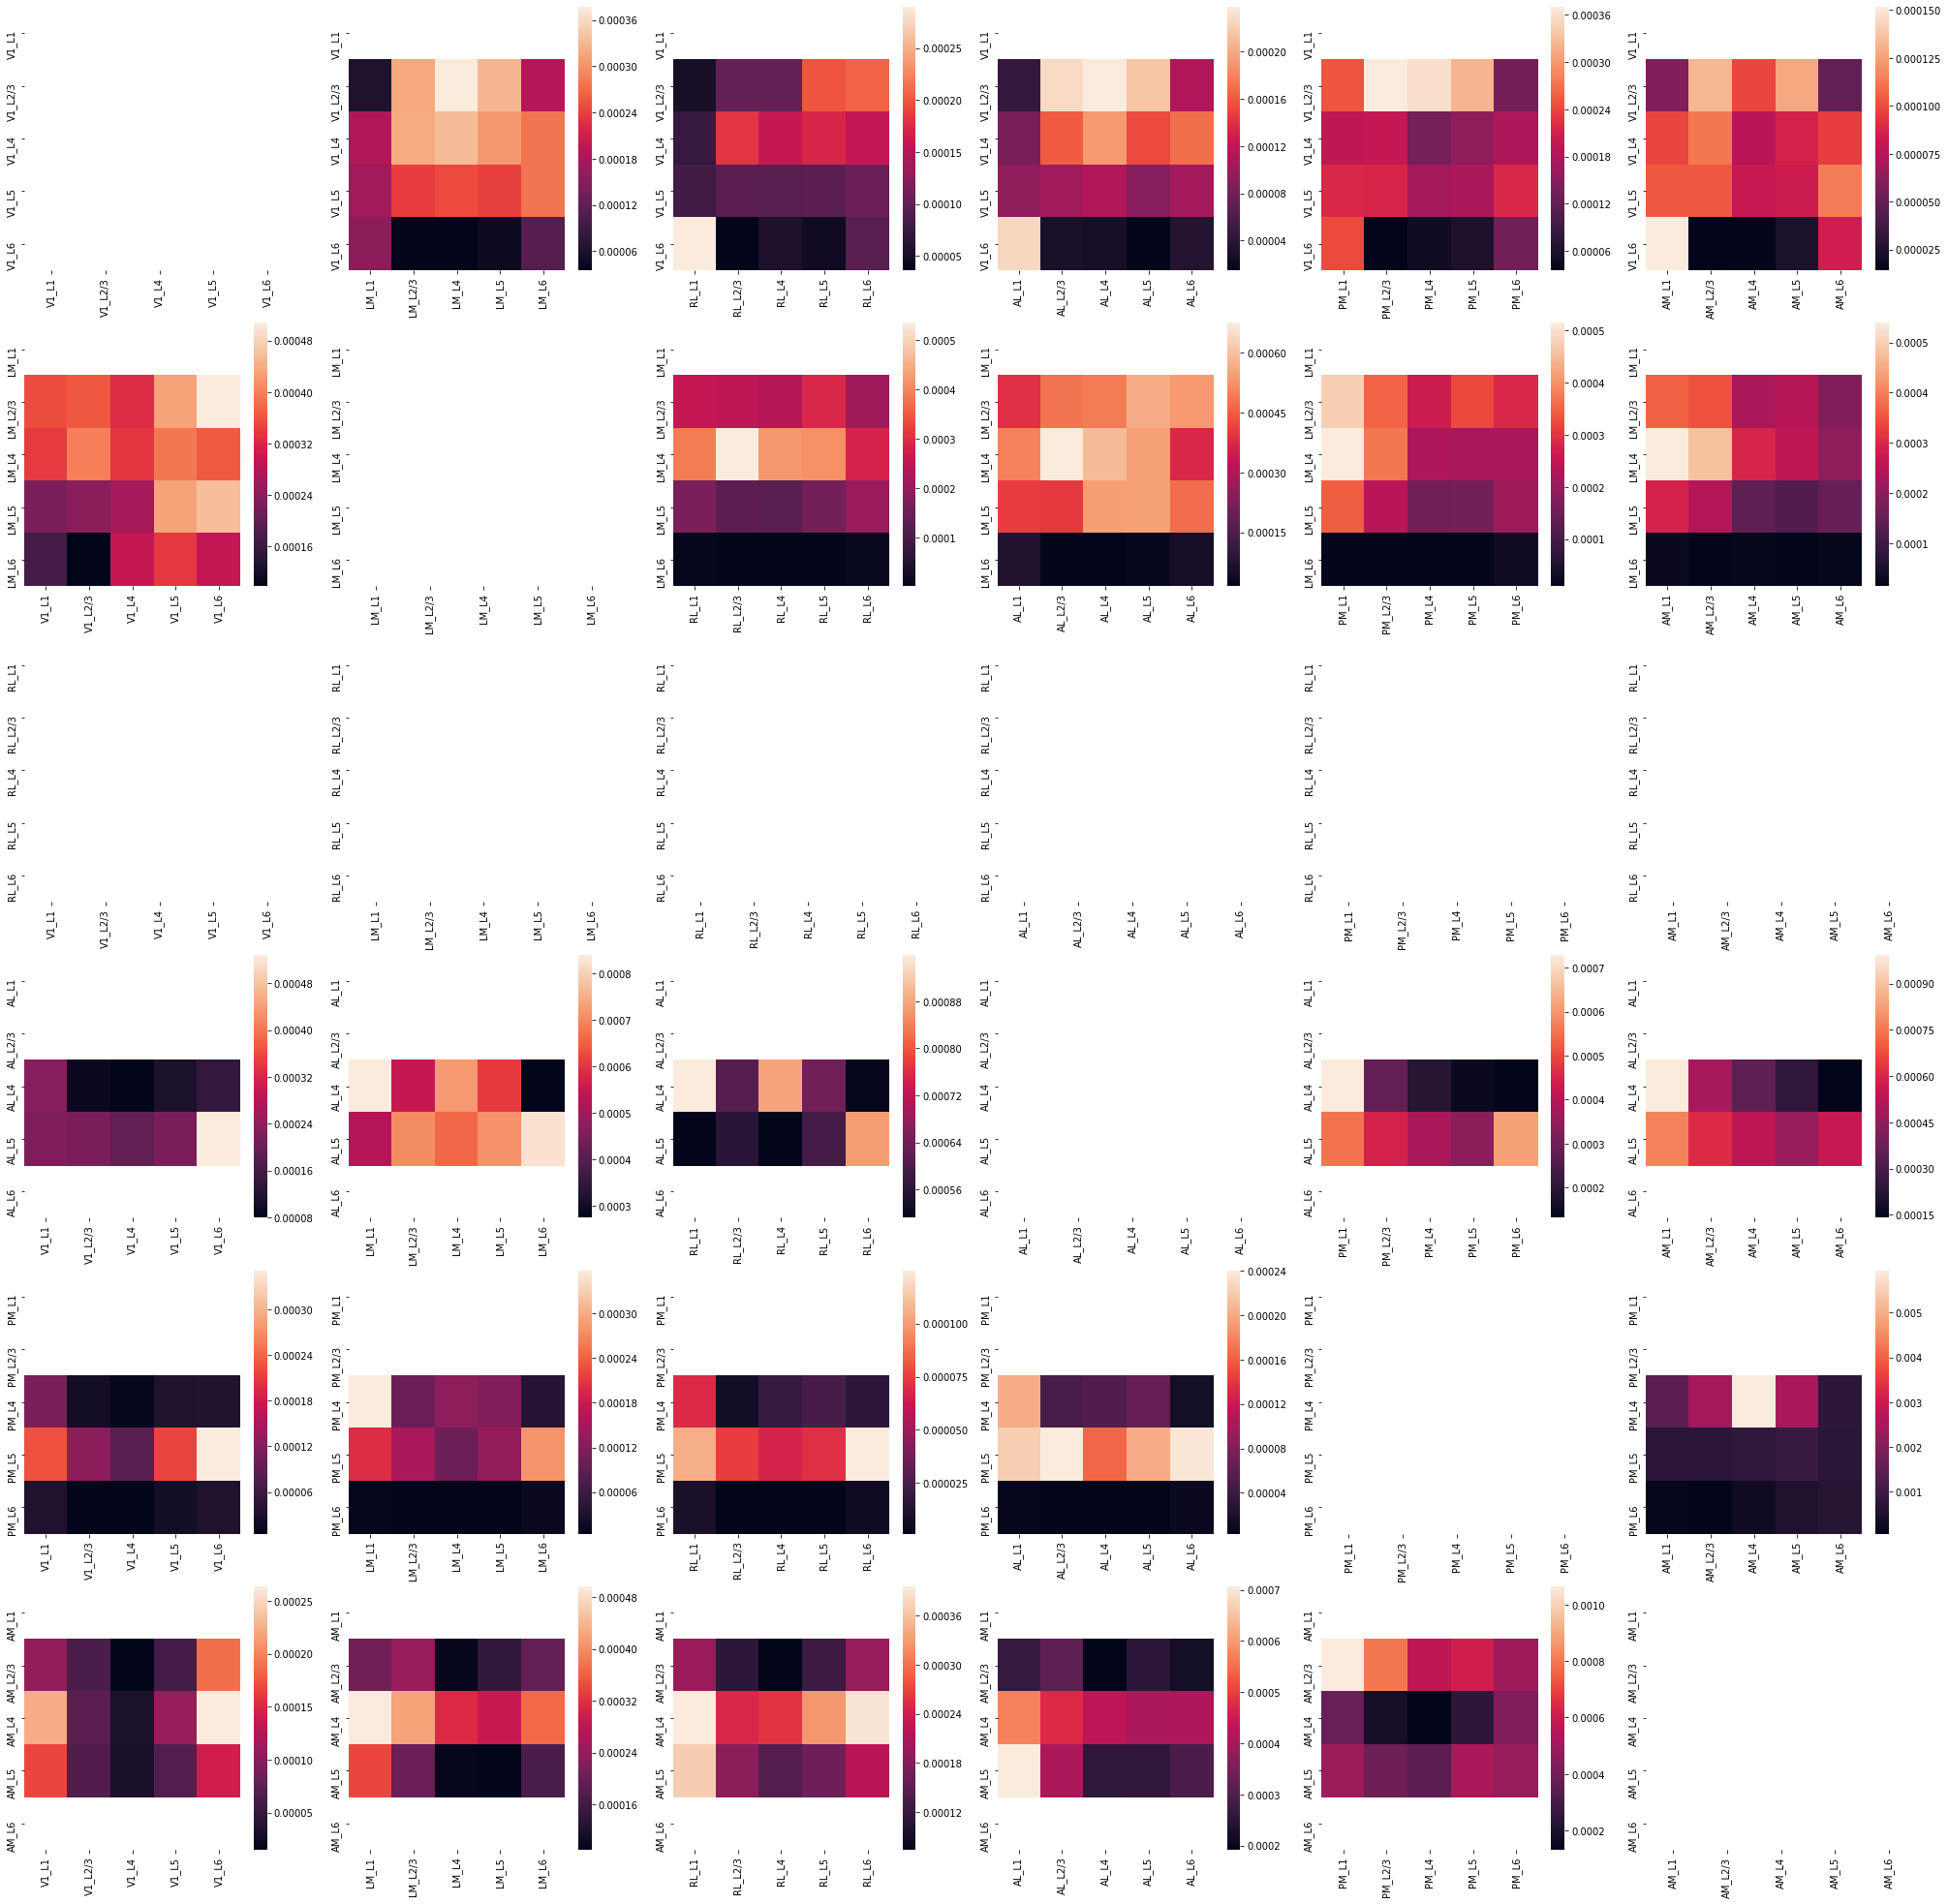

In [10]:
fig ,axes = plt.subplots(6,6,figsize = (35,35))

for i in range(6):
    for j in range(6):
        print(i,j)
        sr = ac_den_zack.iloc[(5*i):(5*i+5),(5*j):(5*j+5)]
        if ~np.isnan(np.nanmax(np.asarray(sr))):
            sns.heatmap(sr, ax = axes[i,j])
        else:
            tmp = pd.DataFrame(np.zeros((5,5)), index = sr.iloc[:5,:5].index, columns = sr.iloc[:5,:5].columns)
            sns.heatmap(tmp, ax = axes[i,j], cmap=ListedColormap(['white']),cbar=False)#, color= 'white')
            #axes[i,j].set_colorbar('off')
            #ax.col
        xticklabels = axes[i,j].get_xticklabels()
        axes[i,j].set_xticklabels(xticklabels, rotation = 90)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_den_subplots')

0 0


/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


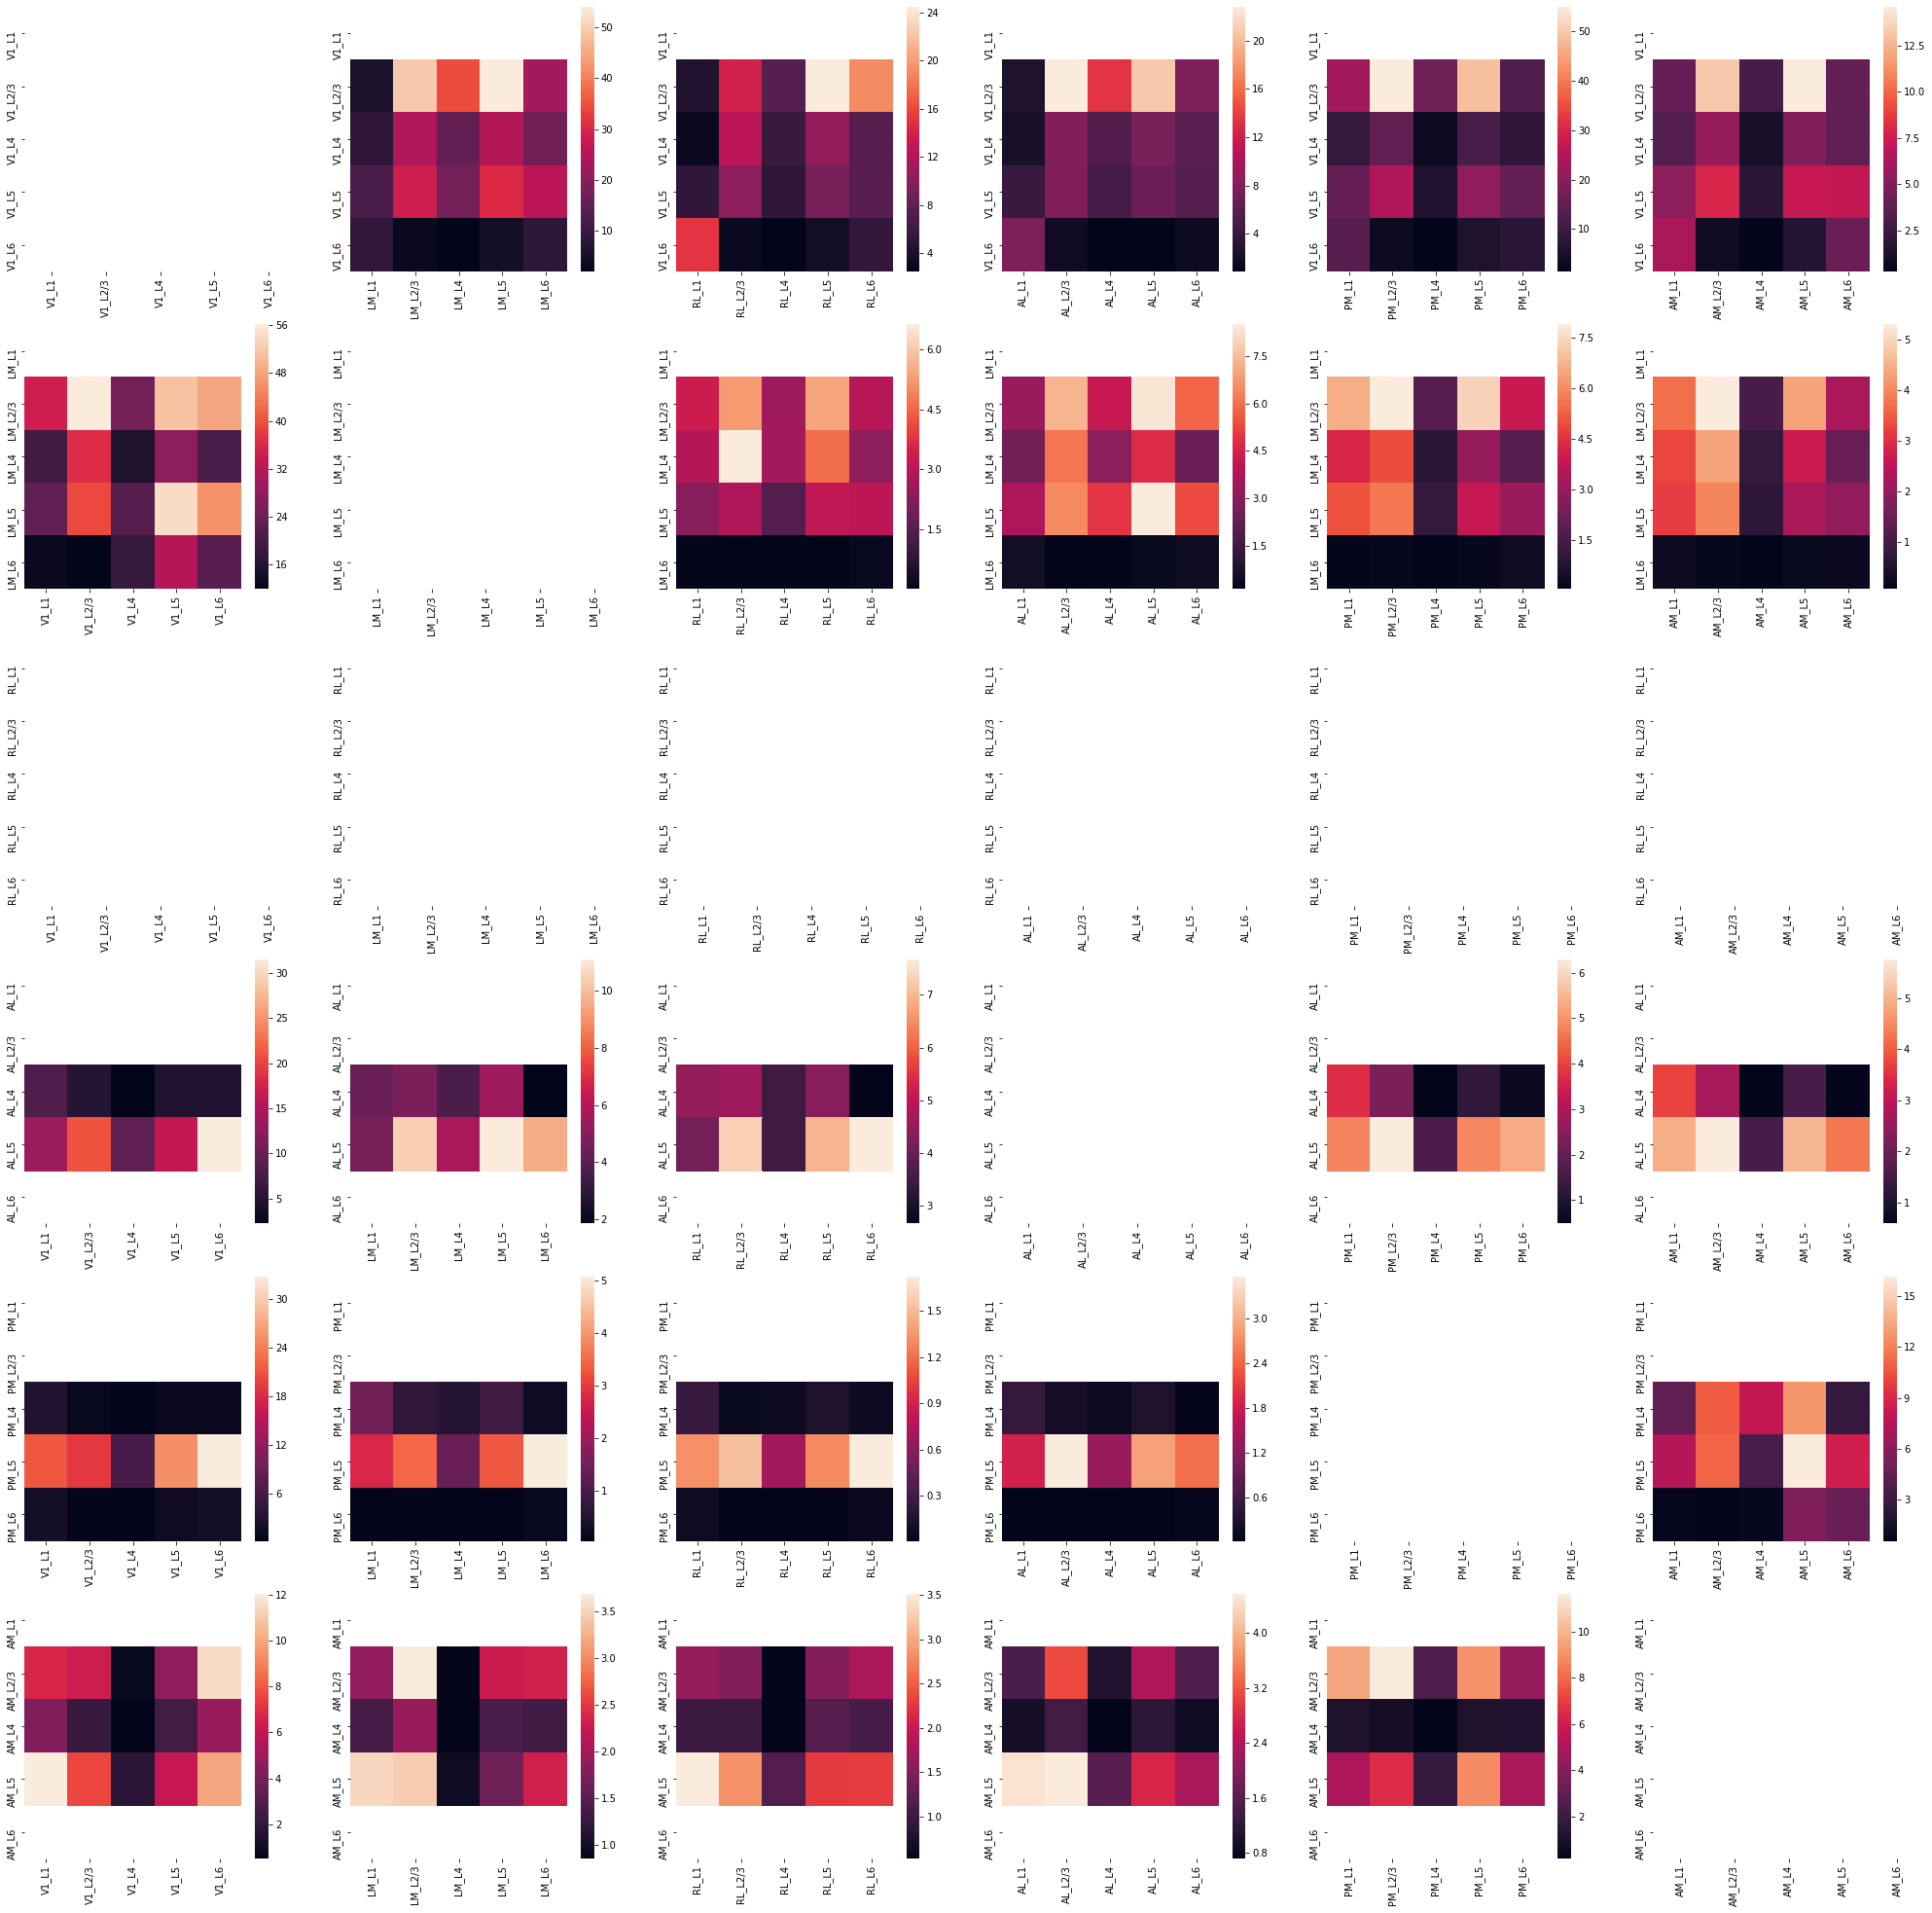

In [11]:
fig ,axes = plt.subplots(6,6,figsize = (35,35))

for i in range(6):
    for j in range(6):
        print(i,j)
        sr = ac_tot_zack.iloc[(5*i):(5*i+5),(5*j):(5*j+5)]
        if ~np.isnan(np.nanmax(np.asarray(sr))):
            sns.heatmap(sr, ax = axes[i,j])
        else:
            tmp = pd.DataFrame(np.zeros((5,5)), index = sr.iloc[:5,:5].index, columns = sr.iloc[:5,:5].columns)
            sns.heatmap(tmp, ax = axes[i,j], cmap=ListedColormap(['white']),cbar=False)#, color= 'white')
            #axes[i,j].set_colorbar('off')
            #ax.col
        xticklabels = axes[i,j].get_xticklabels()
        axes[i,j].set_xticklabels(xticklabels, rotation = 90)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomic_conn_total_subplots')

In [12]:
files_to_read = np.asarray(os.listdir('/Users/samsonkoelle/Downloads/sess_csv/'))

In [13]:
total_files = np.asarray(['tot_tot.csv', 'tot_hi.csv','tot_low.csv'])

In [14]:
exp_files = np.setdiff1d(files_to_read, total_files)

In [15]:
cors = {}
correlations_strength = pd.DataFrame()
for file in exp_files:
    print(file)
    fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/' + file, index_col = 0)
    m1 = np.reshape(np.asarray(ac_tot_zack), 900)
    m2 = np.reshape(np.asarray(fpd), 900)
    keepinds = np.where(~np.isnan(m1))[0]
    correlations_strength.loc[str(file)[:9], str(file)[9:]] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]
    
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_strength.loc['total','.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_strength.loc['total','_low.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_strength.loc['total','_hi.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

719161530.csv
719161530_hi.csv
719161530_low.csv
721123822.csv
721123822_hi.csv
721123822_low.csv
732592105.csv
732592105_hi.csv
732592105_low.csv
737581020.csv
737581020_hi.csv
737581020_low.csv
739448407.csv
739448407_hi.csv
739448407_low.csv
742951821.csv
742951821_hi.csv
742951821_low.csv
743475441.csv
743475441_hi.csv
743475441_low.csv
744228101.csv
744228101_hi.csv
744228101_low.csv
746083955.csv
746083955_hi.csv
746083955_low.csv
750332458.csv
750332458_hi.csv
750332458_low.csv
750749662.csv
750749662_hi.csv
750749662_low.csv
751348571.csv
751348571_hi.csv
751348571_low.csv
754312389.csv
754312389_hi.csv
754312389_low.csv


/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


754829445.csv
754829445_hi.csv
754829445_low.csv
755434585.csv
755434585_hi.csv
755434585_low.csv
756029989.csv
756029989_hi.csv
756029989_low.csv
757216464.csv
757216464_hi.csv
757216464_low.csv
757970808.csv
757970808_hi.csv
757970808_low.csv
758798717.csv
758798717_hi.csv
758798717_low.csv
759883607.csv
759883607_hi.csv
759883607_low.csv
760345702.csv
760345702_hi.csv
760345702_low.csv
760693773.csv
760693773_hi.csv
760693773_low.csv
761418226.csv
761418226_hi.csv
761418226_low.csv
762120172.csv
762120172_hi.csv
762120172_low.csv
762602078.csv
762602078_hi.csv
762602078_low.csv
763673393.csv
763673393_hi.csv
763673393_low.csv
773418906.csv
773418906_hi.csv
773418906_low.csv
791319847.csv
791319847_hi.csv
791319847_low.csv
798911424.csv
798911424_hi.csv
798911424_low.csv
799864342.csv
799864342_hi.csv
799864342_low.csv


In [16]:
#correlations_strength
#correlations_den
correlations_strength.to_csv('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_corr_strength.csv')

In [17]:
cors = {}
correlations_den = pd.DataFrame()
for file in exp_files:
    print(file)
    fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/' + file, index_col = 0)
    m1 = np.reshape(np.asarray(ac_den_zack), 900)
    m2 = np.reshape(np.asarray(fpd), 900)
    keepinds = np.where(~np.isnan(m1))[0]
    correlations_den.loc[str(file)[:9], str(file)[9:]] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]
    
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
#m1 = np.reshape(np.asarray(ac_den_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_den.loc['total','.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(ac_den_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_den.loc['total','_low.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(ac_den_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_den.loc['total','_hi.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

719161530.csv
719161530_hi.csv
719161530_low.csv
721123822.csv
721123822_hi.csv
721123822_low.csv
732592105.csv
732592105_hi.csv
732592105_low.csv
737581020.csv
737581020_hi.csv
737581020_low.csv
739448407.csv
739448407_hi.csv
739448407_low.csv
742951821.csv
742951821_hi.csv
742951821_low.csv
743475441.csv
743475441_hi.csv
743475441_low.csv
744228101.csv
744228101_hi.csv
744228101_low.csv
746083955.csv
746083955_hi.csv
746083955_low.csv
750332458.csv
750332458_hi.csv
750332458_low.csv
750749662.csv
750749662_hi.csv
750749662_low.csv
751348571.csv
751348571_hi.csv
751348571_low.csv
754312389.csv
754312389_hi.csv
754312389_low.csv
754829445.csv
754829445_hi.csv
754829445_low.csv
755434585.csv
755434585_hi.csv
755434585_low.csv
756029989.csv
756029989_hi.csv
756029989_low.csv
757216464.csv
757216464_hi.csv
757216464_low.csv
757970808.csv
757970808_hi.csv
757970808_low.csv
758798717.csv
758798717_hi.csv
758798717_low.csv
759883607.csv
759883607_hi.csv
759883607_low.csv
760345702.csv
760345

In [18]:
#correlations_den
correlations_den.to_csv('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_corr_den.csv')

In [19]:
cors = {}
correlations_tot = pd.DataFrame()
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
keepinds = np.where(~np.isnan(m1))[0]
for file in exp_files:
    print(file)
    fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/' + file, index_col = 0)
    m2 = np.reshape(np.asarray(fpd), 900)
    correlations_tot.loc[str(file)[:9], str(file)[9:]] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]
    
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_tot.loc['total','.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_tot.loc['total','_low.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]
correlations_tot.loc['total','_hi.csv'] = np.corrcoef(m1[keepinds], m2[keepinds])[1,0]

719161530.csv
719161530_hi.csv
719161530_low.csv
721123822.csv
721123822_hi.csv
721123822_low.csv
732592105.csv
732592105_hi.csv
732592105_low.csv
737581020.csv
737581020_hi.csv
737581020_low.csv
739448407.csv
739448407_hi.csv
739448407_low.csv
742951821.csv
742951821_hi.csv
742951821_low.csv
743475441.csv
743475441_hi.csv
743475441_low.csv
744228101.csv
744228101_hi.csv
744228101_low.csv
746083955.csv
746083955_hi.csv
746083955_low.csv
750332458.csv
750332458_hi.csv
750332458_low.csv
750749662.csv
750749662_hi.csv
750749662_low.csv
751348571.csv
751348571_hi.csv
751348571_low.csv
754312389.csv
754312389_hi.csv
754312389_low.csv
754829445.csv
754829445_hi.csv
754829445_low.csv
755434585.csv
755434585_hi.csv
755434585_low.csv
756029989.csv
756029989_hi.csv
756029989_low.csv
757216464.csv
757216464_hi.csv
757216464_low.csv
757970808.csv
757970808_hi.csv
757970808_low.csv
758798717.csv
758798717_hi.csv
758798717_low.csv
759883607.csv
759883607_hi.csv
759883607_low.csv
760345702.csv
760345

In [20]:
correlations_tot.to_csv('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_corr_total.csv')

In [21]:
con_names = np.empty((30,30), dtype = object)
for i in range(30):
    for j in range(30):
        con_names[i,j] = zack_names[i] + '->' + zack_names[j]
        
cn = np.reshape(con_names, 900)

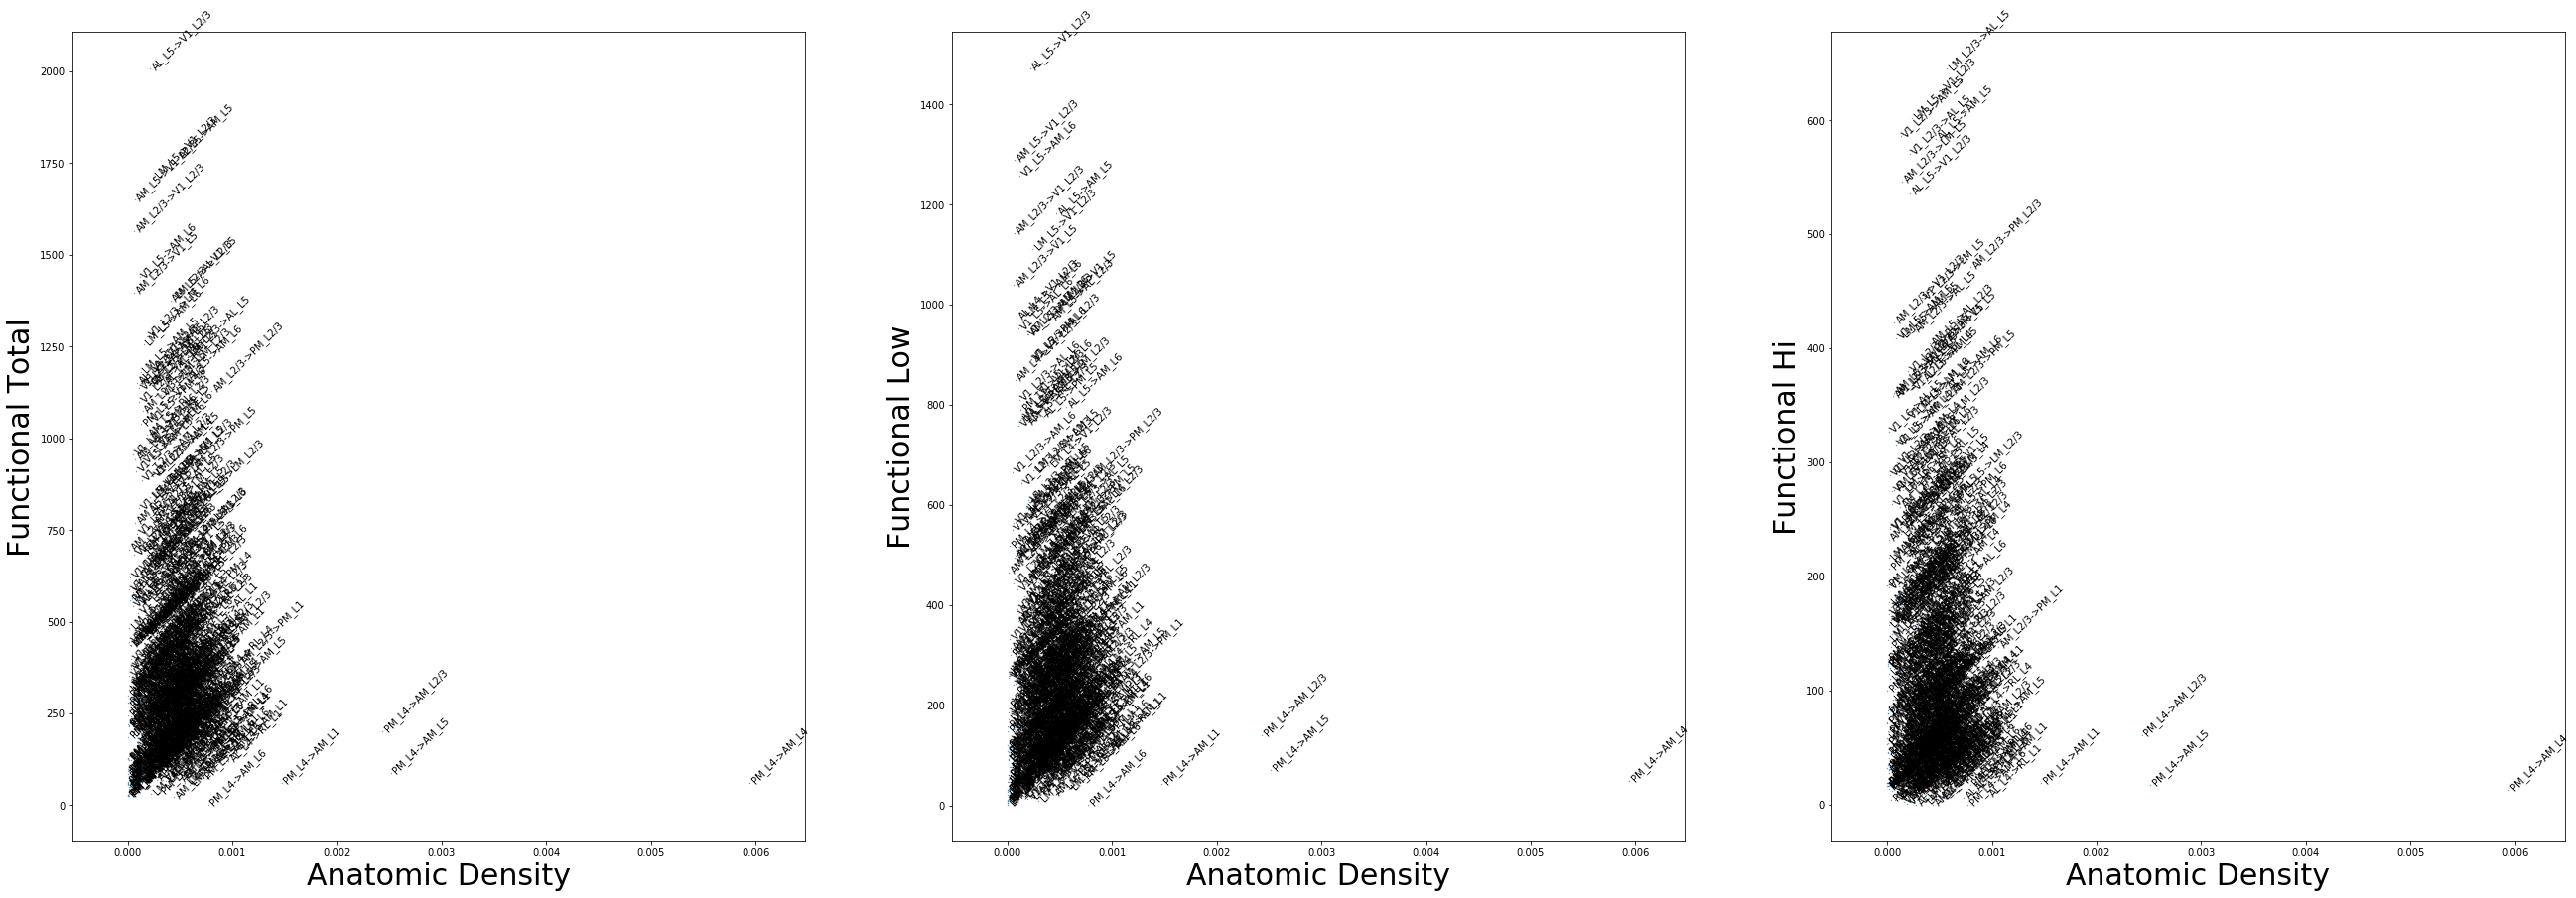

In [22]:
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_den_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]

fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[0].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[0].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[0].set_xlabel('Anatomic Density', fontsize = 30)
axes[0].set_ylabel('Functional Total', fontsize = 30)


#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[1].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[1].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[1].set_xlabel('Anatomic Density', fontsize = 30)
axes[1].set_ylabel('Functional Low', fontsize = 30)

#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[2].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[2].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[2].set_xlabel('Anatomic Density', fontsize = 30)
axes[2].set_ylabel('Functional Hi', fontsize = 30)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_scatter_density')

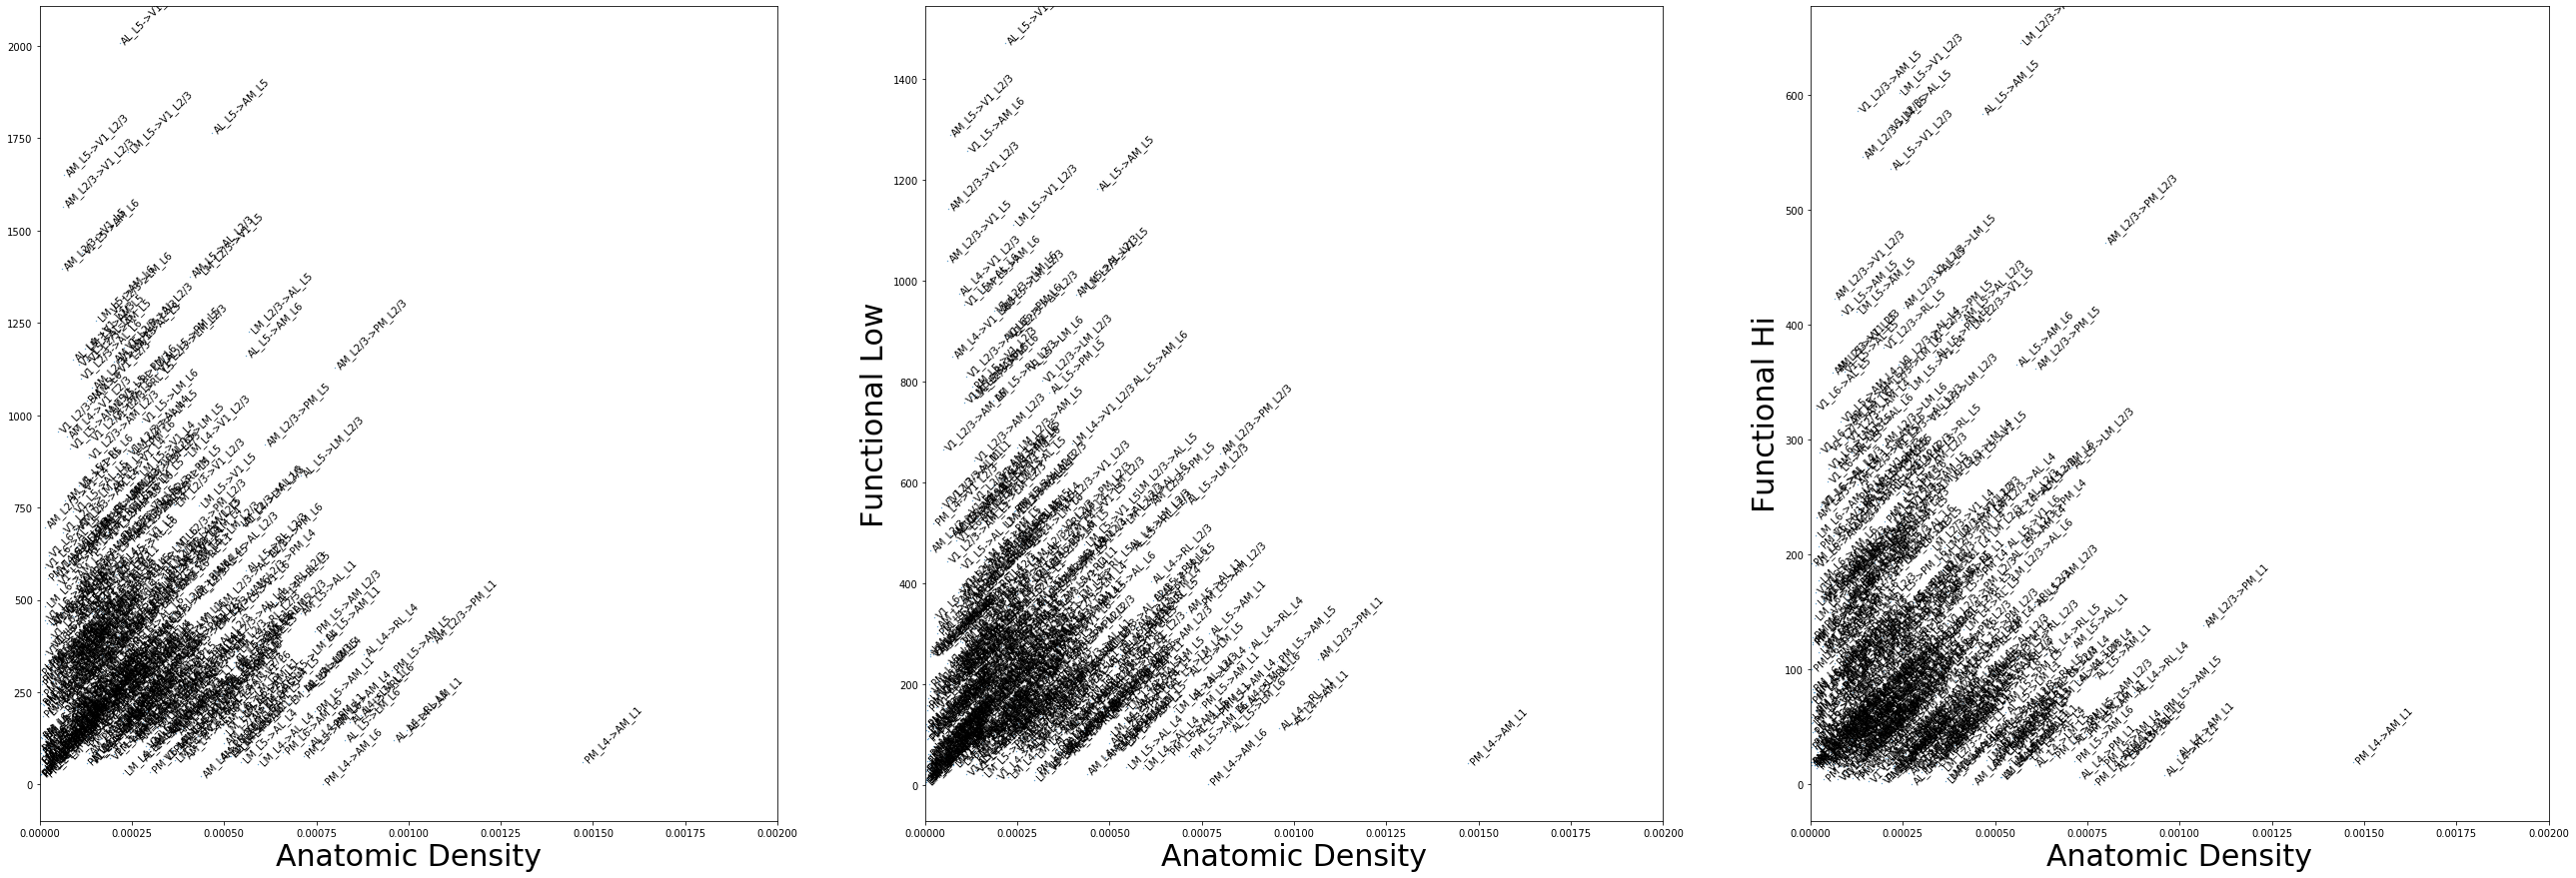

In [23]:
%matplotlib inline
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_den_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]

fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[0].set_xlim(0,0.002)
axes[1].set_xlim(0,0.002)
axes[2].set_xlim(0,0.002)

axes[0].scatter(m1[keepinds], m2[keepinds], s = .1)
#

for i in range(keepinds.shape[0]):
    axes[0].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], clip_on=True, fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[0].set_xlabel('Anatomic Density', fontsize = 30)
#axes[

fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[1].scatter(m1[keepinds], m2[keepinds], s = .1)
#axes[1].set_xlim(0,0.0001)
for i in range(keepinds.shape[0]):
    axes[1].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], clip_on=True, fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[1].set_xlabel('Anatomic Density', fontsize = 30)
axes[1].set_ylabel('Functional Low', fontsize = 30)

#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_tot), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[2].scatter(m1[keepinds], m2[keepinds], s = .1)
#xes[2].set_xlim(xmin=0.0, xmax=0.0001)
for i in range(keepinds.shape[0]):
    axes[2].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], clip_on=True, fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[2].set_xlabel('Anatomic Density', fontsize = 30)
axes[2].set_ylabel('Functional Hi', fontsize = 30)

axes[0].set_xbound(0,0.002)
axes[1].set_xbound(0,0.002)
axes[2].set_xbound(0,0.002)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_scatter_density_bounded')

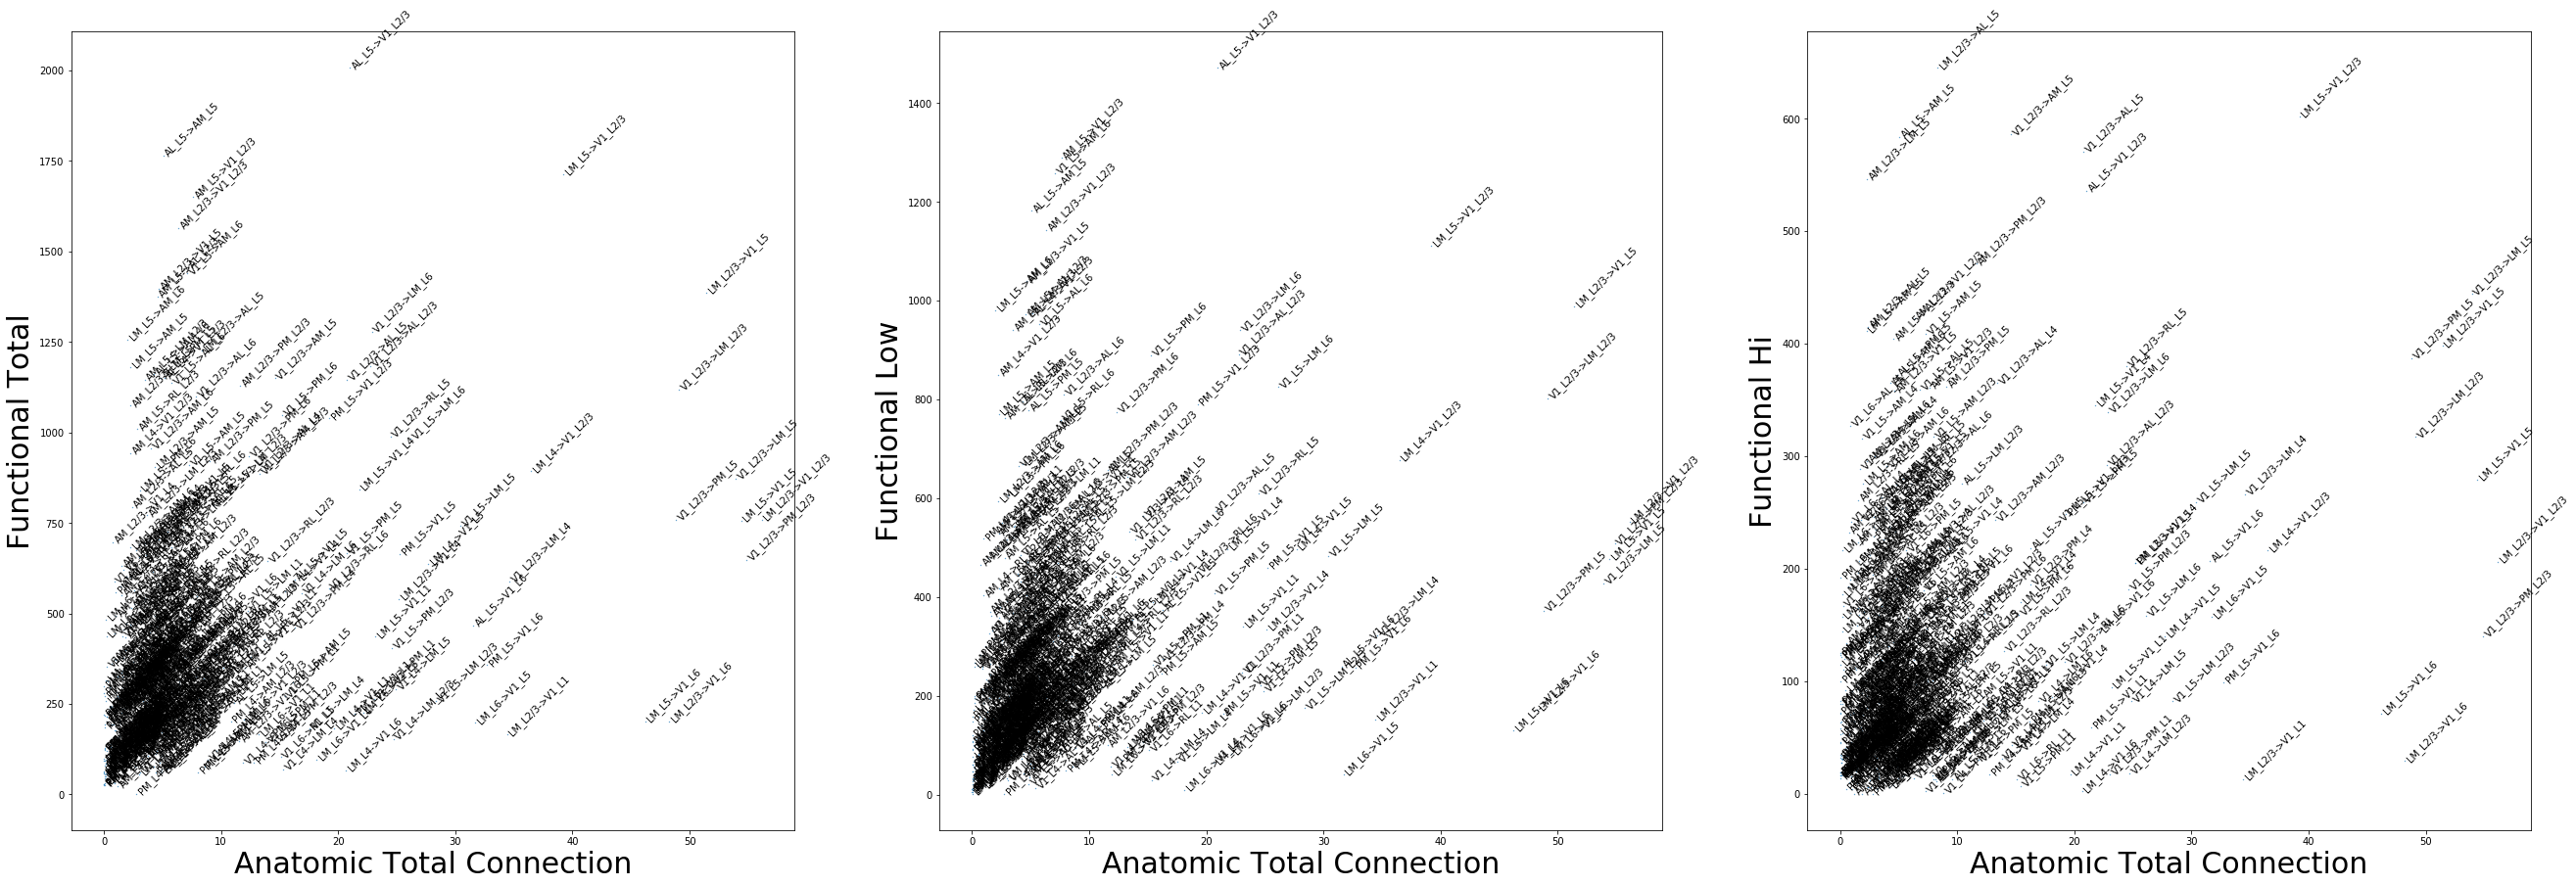

In [24]:
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]

fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[0].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[0].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[0].set_xlabel('Anatomic Total Connection', fontsize = 30)
axes[0].set_ylabel('Functional Total', fontsize = 30)


#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[1].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[1].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[1].set_xlabel('Anatomic Total Connection', fontsize = 30)
axes[1].set_ylabel('Functional Low', fontsize = 30)

#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[2].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[2].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[2].set_xlabel('Anatomic Total Connection', fontsize = 30)
axes[2].set_ylabel('Functional Hi', fontsize = 30)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_scatter_total')

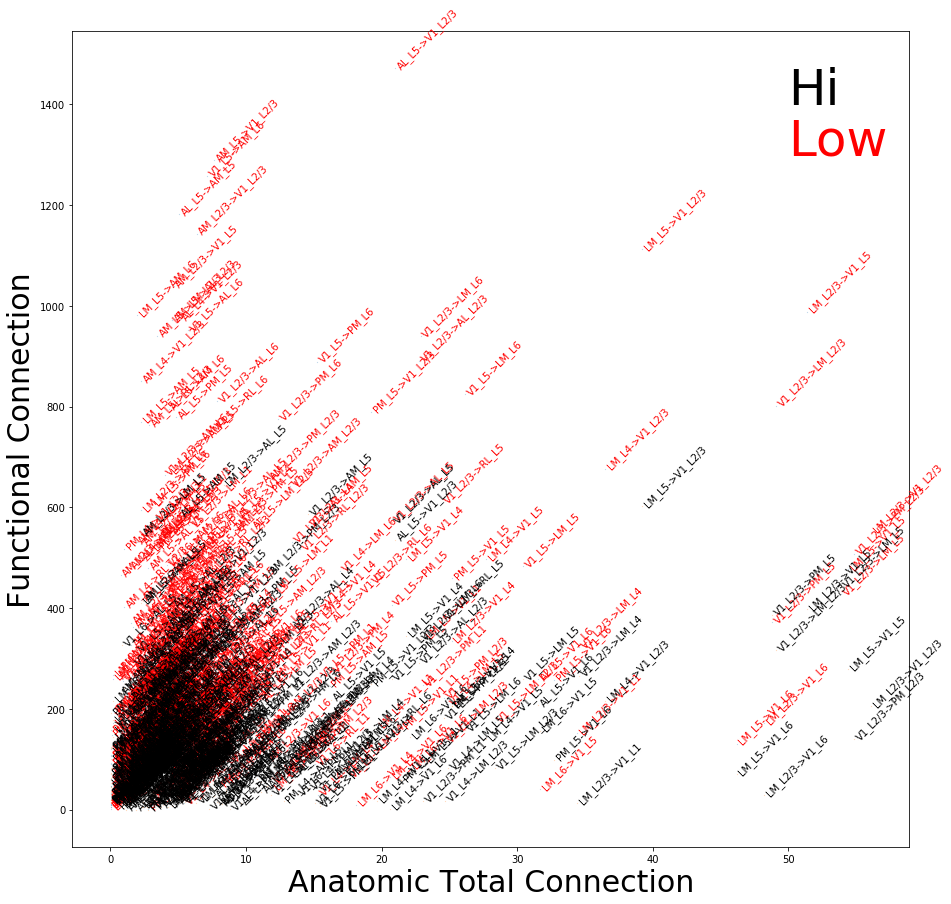

In [25]:
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_tot_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]

fig, ax = plt.subplots(figsize = (15,15))
# axes[0].scatter(m1[keepinds], m2[keepinds], s = .1)
# for i in range(keepinds.shape[0]):
#     axes[0].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
# axes[0].set_xlabel('Anatomic Total', fontsize = 30)
# axes[0].set_ylabel('Functional Total', fontsize = 30)


#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
ax.scatter(m1[keepinds], m2[keepinds], s = .01)
for i in range(keepinds.shape[0]):
    ax.text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45}, color ='red', label='Low')#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
ax.set_xlabel('Anatomic Total Connection', fontsize = 30)
ax.set_ylabel('Functional Connection', fontsize = 30)
#ax.set_ylabel('Functional Low', fontsize = 30)

#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
ax.scatter(m1[keepinds], m2[keepinds], s = .01)
for i in range(keepinds.shape[0]):
    ax.text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45}, label='Hi')#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
#ax.set_xlabel('Anatomic Total', fontsize = 30)
#ax.set_ylabel('Functional Hi', fontsize = 30)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
ax.text(50,1400,'Hi', c = 'black', fontsize = 50)
ax.text(50,1300,'Low', c = 'red', fontsize = 50)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_scatter_total_compare')

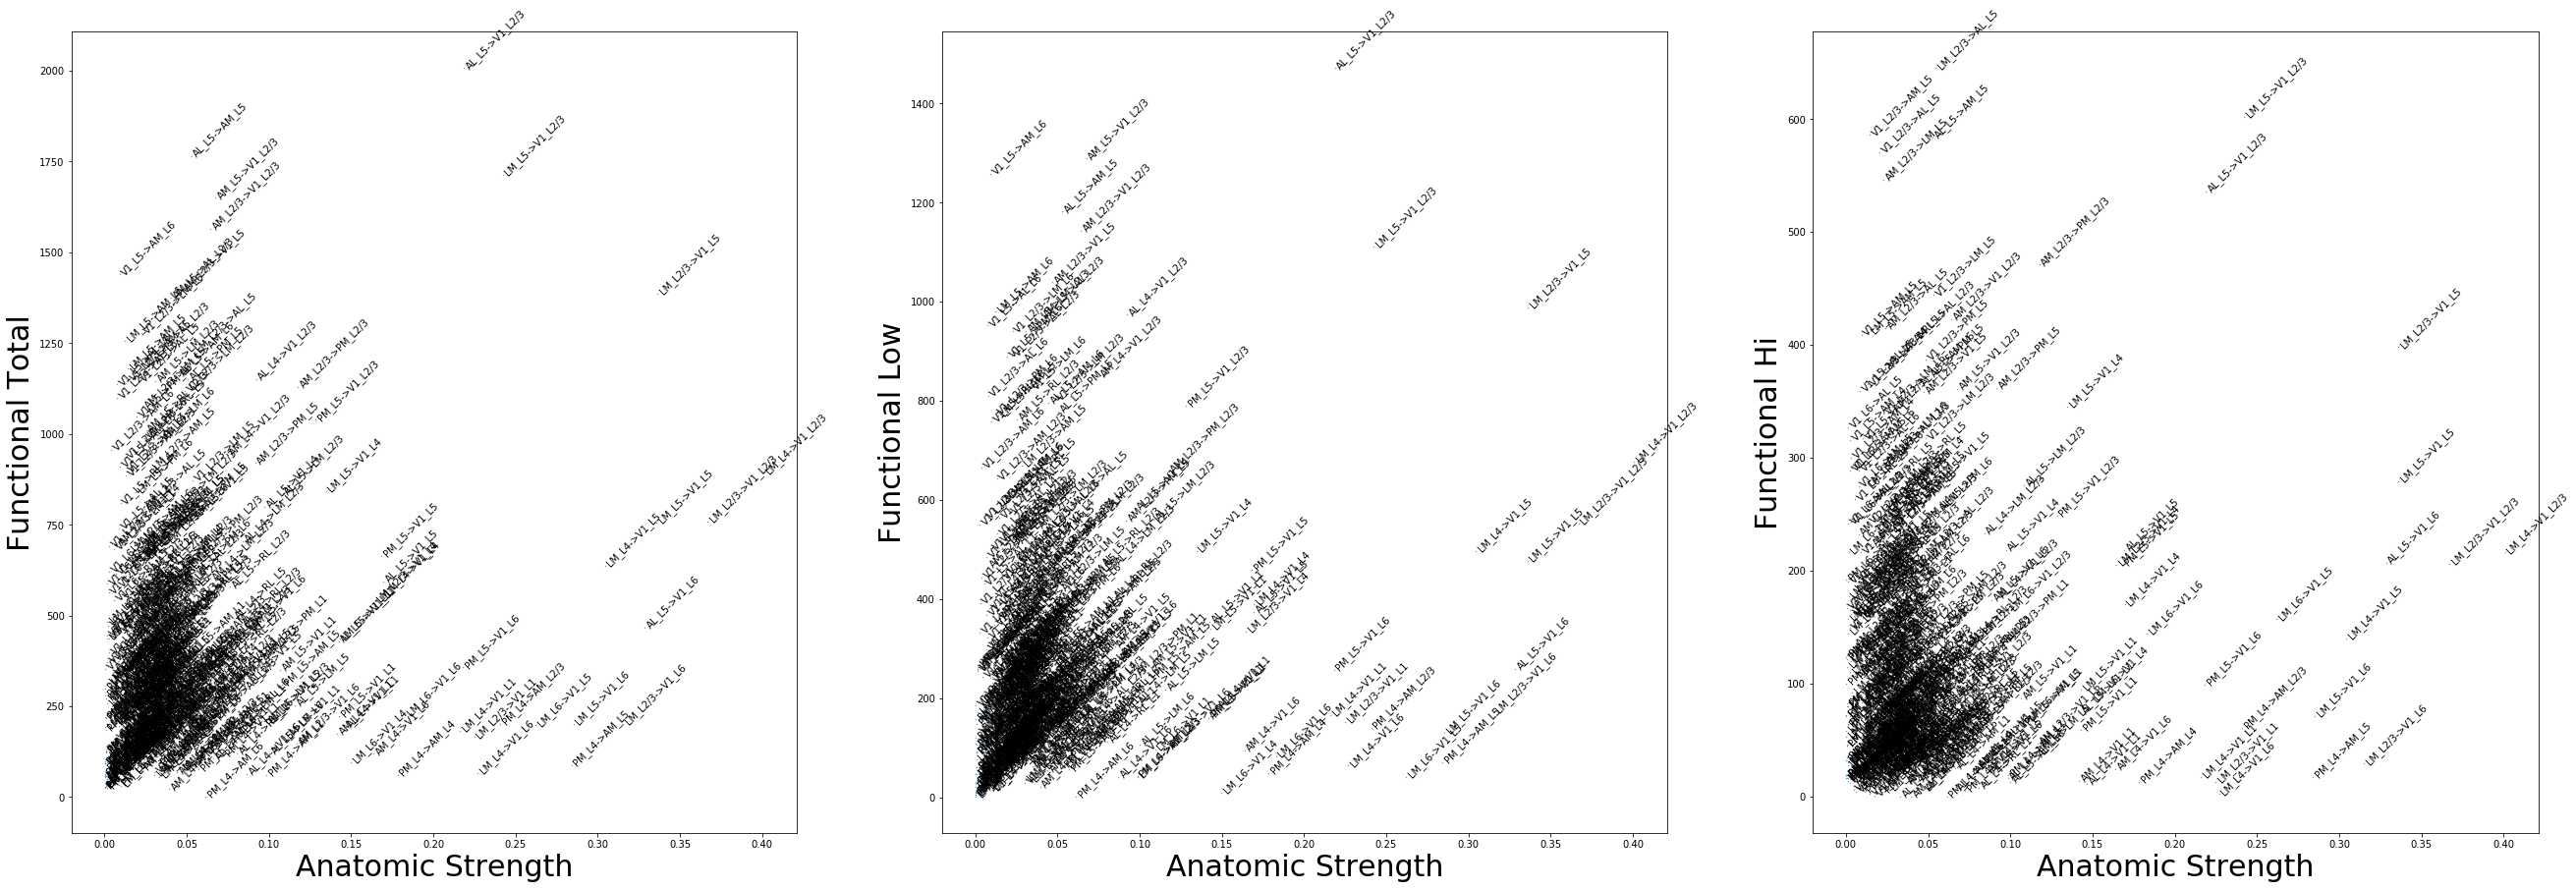

In [26]:
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_tot.csv', index_col = 0)
m1 = np.reshape(np.asarray(ac_strength_zack), 900)
m2 = np.reshape(np.asarray(fpd), 900)
keepinds = np.where(~np.isnan(m1))[0]

fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[0].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[0].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[0].set_xlabel('Anatomic Strength', fontsize = 30)
axes[0].set_ylabel('Functional Total', fontsize = 30)


#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_low.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_den), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[1].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[1].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[1].set_xlabel('Anatomic Strength', fontsize = 30)
axes[1].set_ylabel('Functional Low', fontsize = 30)

#
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/tot_hi.csv', index_col = 0)
#m1 = np.reshape(np.asarray(anatomic_connectivities_den), 900)
m2 = np.reshape(np.asarray(fpd), 900)
#keepinds = np.where(~np.isnan(m1))[0]

#fig, axes = plt.subplots(1,3, figsize = (45,15))
axes[2].scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(keepinds.shape[0]):
    axes[2].text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
axes[2].set_xlabel('Anatomic Strength', fontsize = 30)
axes[2].set_ylabel('Functional Hi', fontsize = 30)
plt.savefig('/Users/samsonkoelle/Desktop/forzack/anatomicfunctional_scatter_strength')

In [79]:
keepinds.shape

(480,)